## Telecom Customer Churn

![Telecom Churn Prediction](dataset-cover.jpg)


## About DataSet
#### context
**Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.**
#### content
**Each row represents a customer, each column contains customer’s attributes described on the column Metadata**
#### The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents
#### Data
- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## Import Libraries and data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style = 'white')
import warnings
warnings.simplefilter('ignore')

In [2]:
cust_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
cust_data.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1049,8329-IBCTI,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,Yes
5603,1794-HBQTJ,Female,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.60,48.6,Yes
1743,3768-VHXQO,Male,0,Yes,No,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.85,1583.5,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.4,No
3557,2045-BMBTJ,Female,1,No,No,33,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),59.45,1884.65,No
399,5876-QMYLD,Female,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.1,No
1066,9646-NMHXE,Male,0,Yes,No,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,973.1,No


## Data cleaning

In [3]:
cust_data.shape

(7043, 21)

In [4]:
data_1 = cust_data.copy()
data_1.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
data_1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data_1['TotalCharges'] = pd.to_numeric(data_1['TotalCharges'], errors = 'coerce')
data_1['TotalCharges'].dtypes

dtype('float64')

In [7]:
data_1.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# drop total charges missing values
data_1.dropna(inplace = True)
print('After handling missing Values\n', data_1.isnull().sum())
print('-'*20)

# drop unneeded columns
data_1 = data_1.drop(['customerID'], axis = 1)

# encode categorical columns
data_1['Churn'] = data_1['Churn'].map({'Yes': 1, 'No': 0})
data_with_dummies = pd.get_dummies(data_1)
data_with_dummies.head()

After handling missing Values
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
--------------------


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

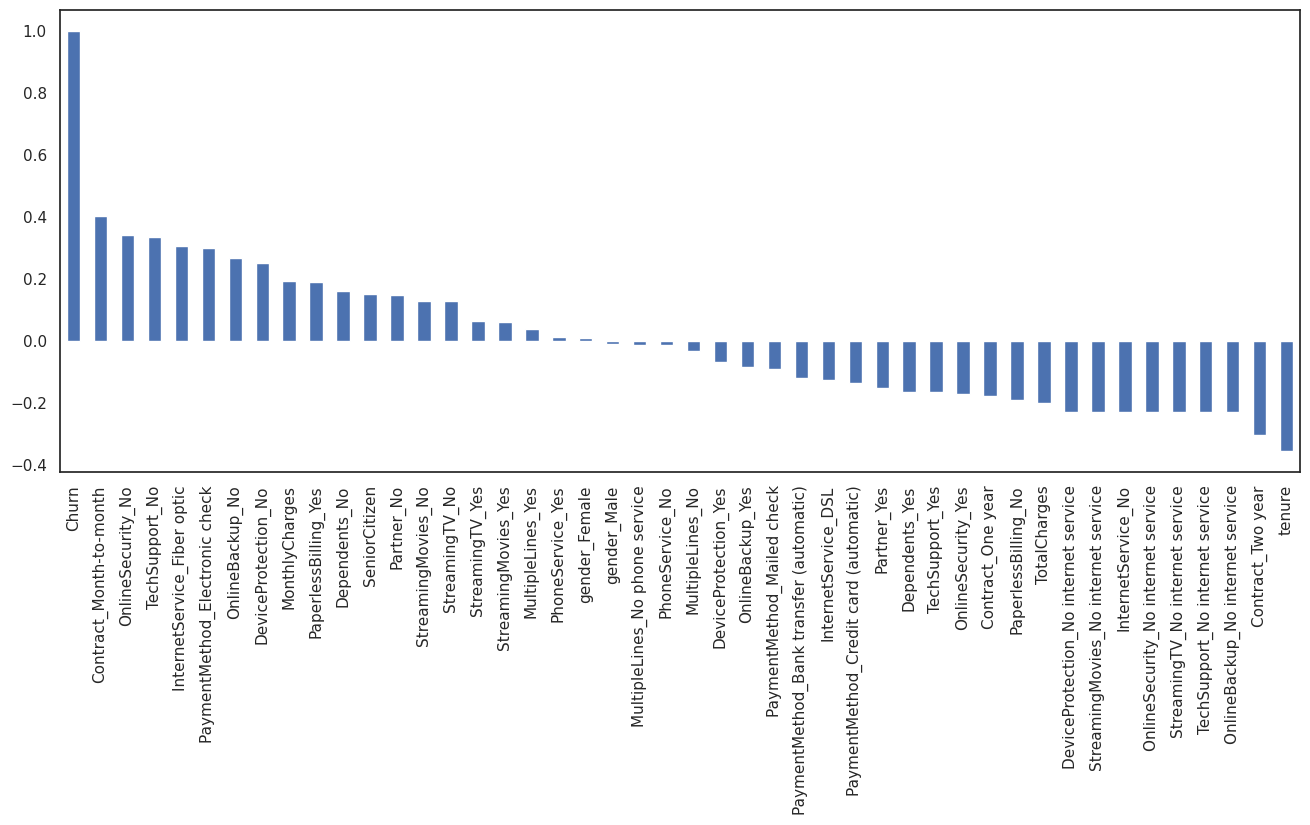

In [9]:
# show correlation between CHurn and other features
plt.figure(figsize = (16, 6))
data_with_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')


Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

## Data Exploration - EDA

**A.)** ***Demographics***
- Let us first understand the gender, age range, patner and dependent status of the customers

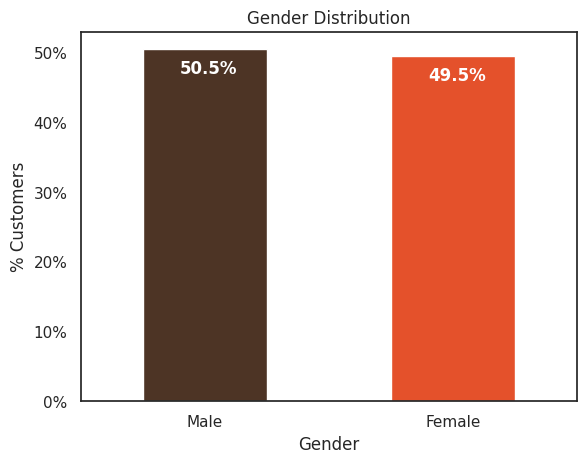

In [10]:
# Gender Distribution
import matplotlib.ticker as mtick           # For specifying the axes tick format 

colors = ['#4D3425','#E4512B']
ax = (data_1['gender'].value_counts()*100.0 /len(data_1)).plot(kind = 'bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize = 12,
            color = 'white',
           weight = 'bold')

Text(0, 0.5, 'Senior Citizens')

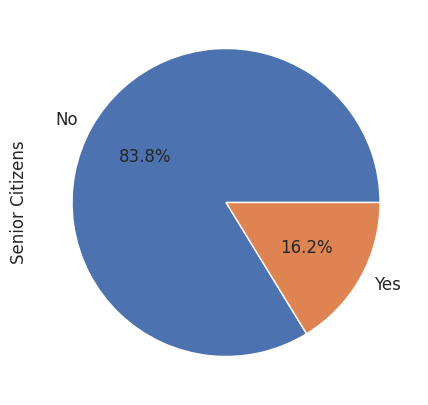

In [11]:
# Senior citizens 
ax = (data_1['SeniorCitizen'].value_counts()*100.0 /len(data_1)).plot.pie(autopct = '%.1f%%',
                                                                           labels = ['No', 'Yes'],figsize =(5,5),
                                                                           fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)

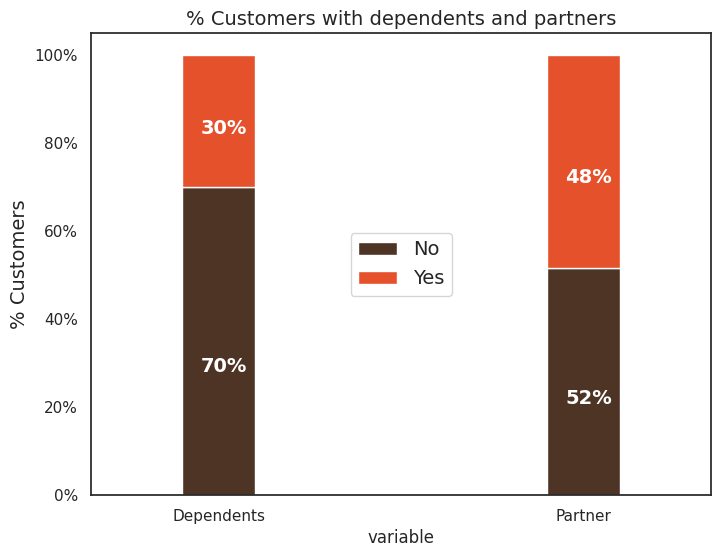

In [12]:
# Partner and Dependent Status
df_1 = pd.melt(cust_data, id_vars = ['customerID'], value_vars = ['Dependents','Partner'])
df_2 = df_1.groupby(['variable','value']).count().unstack()
df_3 = df_2 * 100 / len(cust_data)
ax = df_3.loc[:,'customerID'].plot.bar(stacked = True, color = colors,
                                      figsize = (8,6), rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop = {'size': 14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4 * height),
                color = 'white',
               weight = 'bold',
               size = 14)

**B.)** ***Customer Account Information***:  
- Let us now look at the tenure, contract

Text(0.5, 1.0, '# of Customers by their tenure')

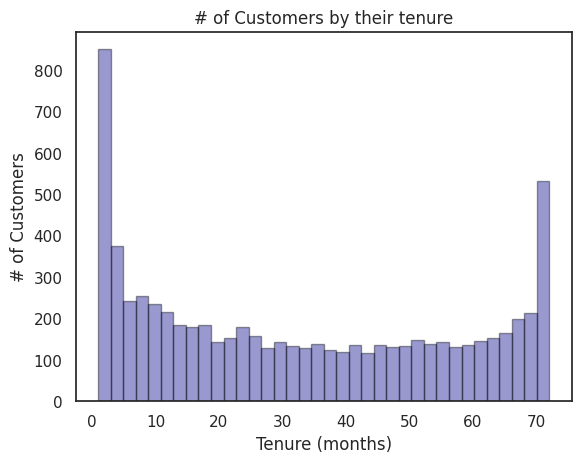

In [13]:
ax = sns.distplot(data_1['tenure'], hist = True, kde = False, 
             bins = int(180/5), color = 'darkblue', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

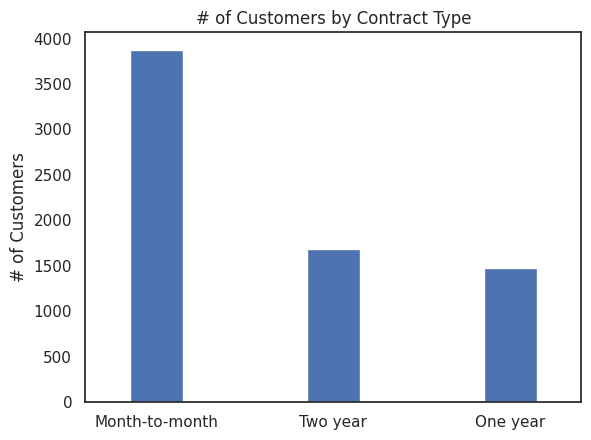

In [14]:
ax = data_1['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

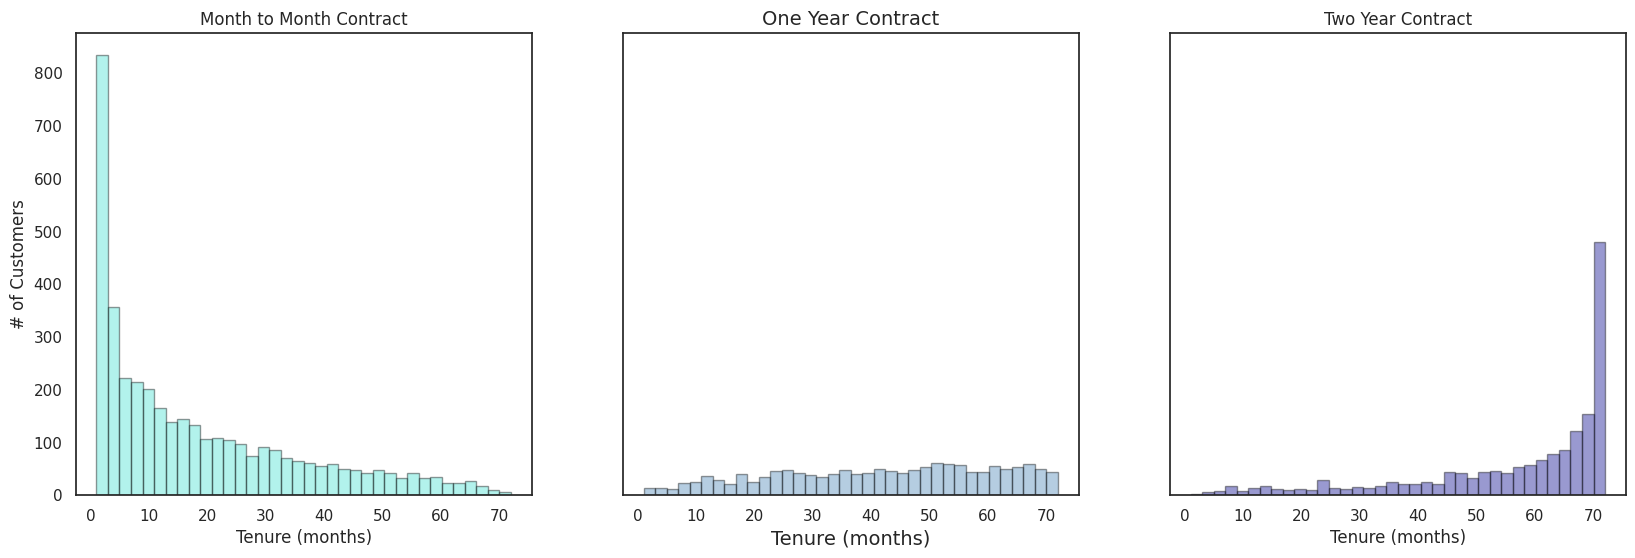

In [15]:
# understand the tenure of customers based on their contract type
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (20,6))

ax = sns.distplot(data_1[data_1['Contract'] == 'Month-to-month']['tenure'],
                   hist = True, kde = False,
                   bins = int(180/5), color = 'turquoise',
                   hist_kws = {'edgecolor': 'black'},
                   kde_kws = {'linewidth': 4},
                 ax = ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data_1[data_1['Contract'] == 'One year']['tenure'],
                   hist = True, kde = False,
                   bins = int(180/5), color = 'steelblue',
                   hist_kws = {'edgecolor': 'black'},
                   kde_kws = {'linewidth': 4},
                 ax = ax2)
ax.set_xlabel('Tenure (months)', size = 14)
ax.set_title('One Year Contract', size = 14)

ax = sns.distplot(data_1[data_1['Contract'] == 'Two year']['tenure'],
                   hist = True, kde = False,
                   bins = int(180/5), color = 'darkblue',
                   hist_kws = {'edgecolor':'black'},
                   kde_kws = {'linewidth': 4},
                 ax = ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

###  C.) Let us now look at the distribution of various services used by customers

In [16]:
data_1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Figure size 1600x900 with 0 Axes>

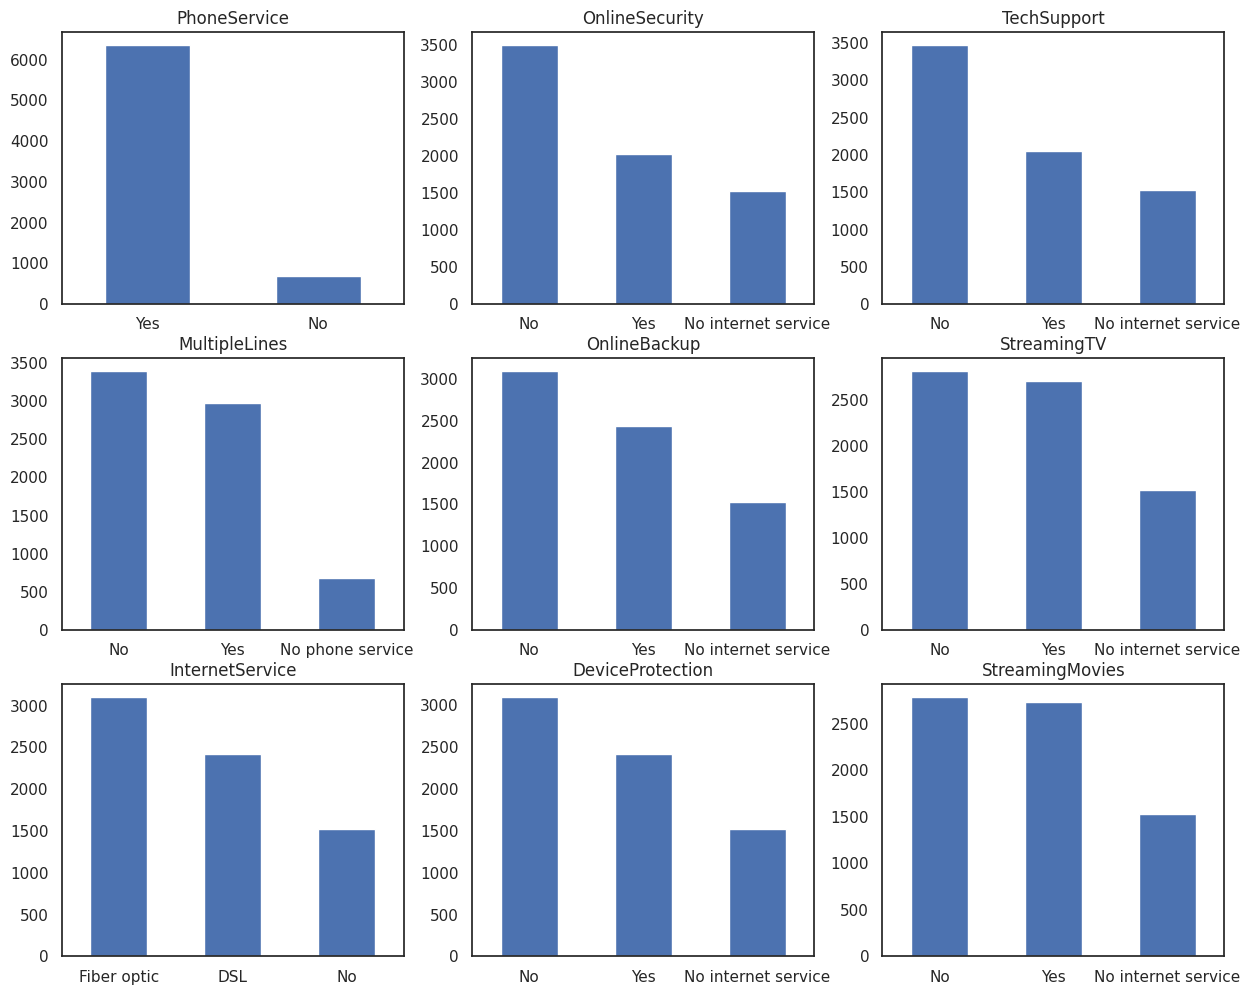

In [17]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize = (16, 9))
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data_1[item].value_counts().plot(kind = 'bar',ax = axes[i,0], rot = 0)
        
    elif i >=3 and i < 6:
        ax = data_1[item].value_counts().plot(kind = 'bar',ax = axes[i-3,1], rot = 0)
        
    elif i < 9:
        ax = data_1[item].value_counts().plot(kind = 'bar',ax = axes[i-6,2], rot = 0)

    ax.set_title(item)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

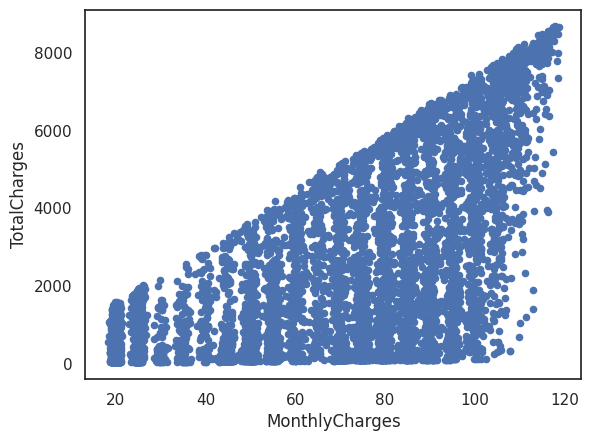

In [18]:
# look at the relation between monthly and total charges
data_1[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

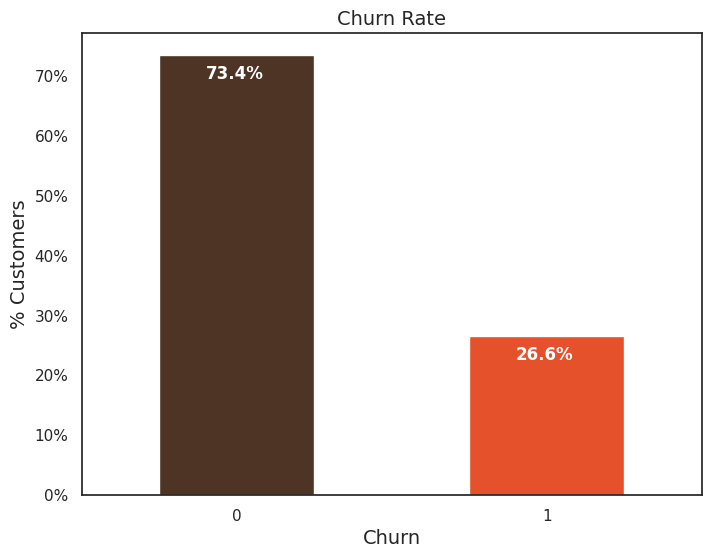

In [19]:
# look at the churn rate in our data
colors = ['#4D3425','#E4512B']
ax = (data_1['Churn'].value_counts()*100.0 /len(data_1)).plot(kind = 'bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            color='white',
           weight = 'bold')

#### Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

<Axes: xlabel='Churn', ylabel='tenure'>

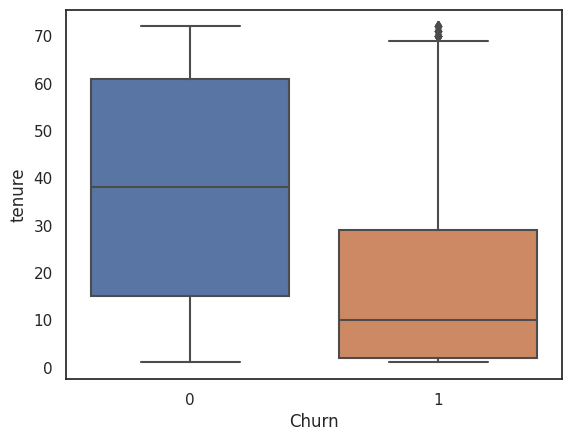

In [20]:
sns.boxplot(x = data_1.Churn, y = data_1.tenure)

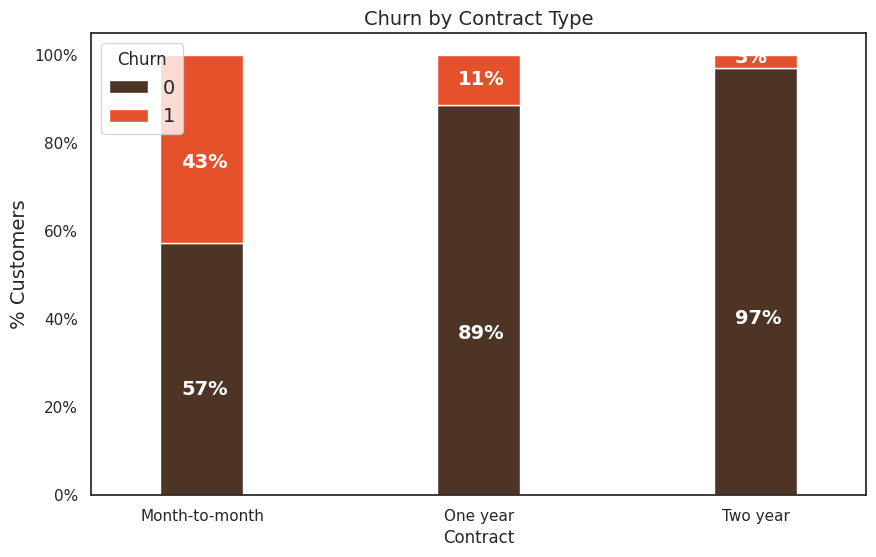

In [21]:
colors = ['#4D3425','#E4512B']
contract_churn = data_1.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind = 'bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10, 6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc = 'best',prop = {'size': 14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

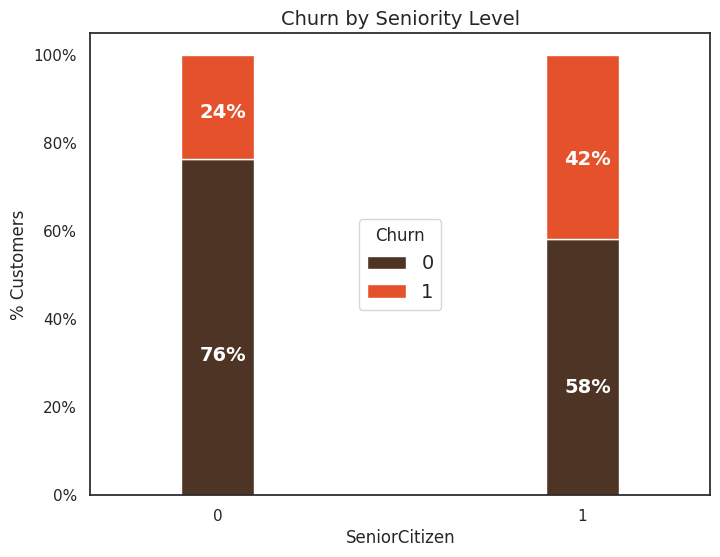

In [22]:
colors = ['#4D3425','#E4512B']
seniority_churn = data_1.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind = 'bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8, 6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc = 'center',prop = {'size': 14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

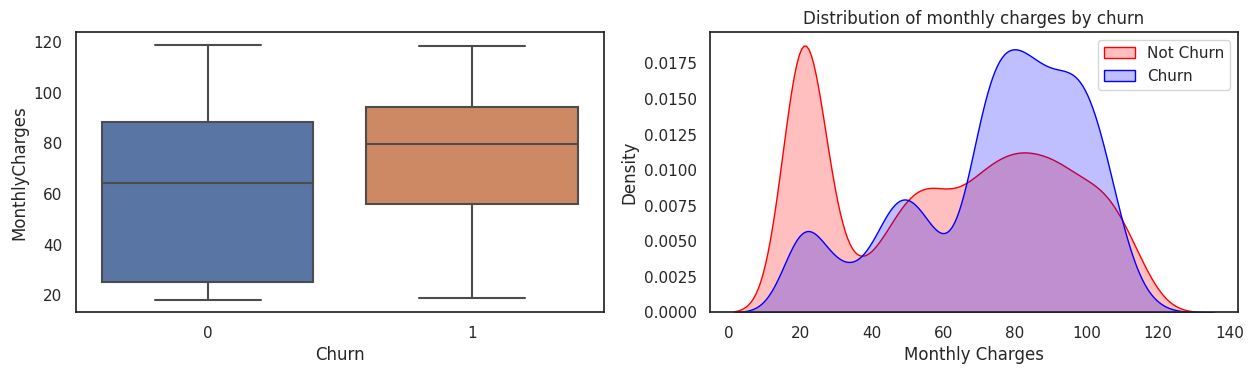

In [23]:
plt.figure(figsize = (15, 8))

plt.subplot(221)
sns.boxplot(x = data_1.Churn, y = data_1.MonthlyCharges)

plt.subplot(222)
ax = sns.kdeplot(data_1.MonthlyCharges[(data_1["Churn"] == 0)],
                color = "Red", shade = True)
ax = sns.kdeplot(data_1.MonthlyCharges[(data_1["Churn"] == 1)],
                ax = ax, color = "Blue", shade = True)
ax.legend(["Not Churn", "Churn"],loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of Total Charges by churn')

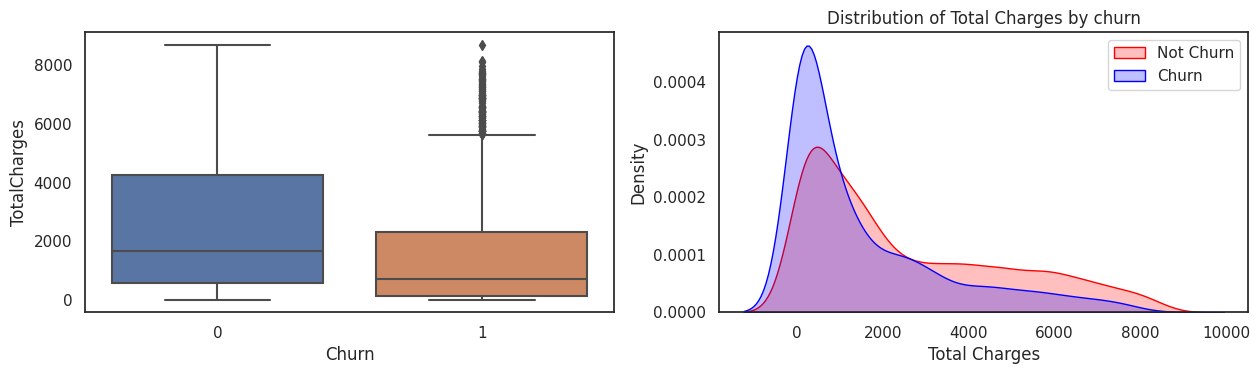

In [24]:
plt.figure(figsize = (15, 8))

plt.subplot(221)
sns.boxplot(x = data_1.Churn, y = data_1.TotalCharges)

plt.subplot(222)
ax = sns.kdeplot(data_1.TotalCharges[(data_1["Churn"] == 0)],
                color = "Red", shade = True)
ax = sns.kdeplot(data_1.TotalCharges[(data_1["Churn"] == 1)],
                ax = ax, color = "Blue", shade = True)
ax.legend(["Not Churn", "Churn"],loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by churn')

## Feature Selection

In [25]:
cat_features = data_with_dummies.columns.difference(data_1.columns).to_list()
num_cols = data_with_dummies.drop(labels = cat_features, axis = 1).columns.to_list()
num_cols.remove('Churn')

print('Categorical Features\n', cat_features)
print('Numerical Features\n', num_cols)

Categorical Features
 ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Dependents_No', 'Dependents_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'Partner_No', 'Partner_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PhoneService_No', 'PhoneService_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSu

### Chi Squared Test
- Feature selection for categorical features

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = data_with_dummies.loc[:, cat_features]
target_value = data_with_dummies.loc[:, 'Churn']

best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features, target_value)

features_score = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['chi Squared Score'])
features_score.sort_values('chi Squared Score', ascending = False)

,chi Squared Score
Contract_Month-to-month,516.714004
Contract_Two year,486.223101
PaymentMethod_Electronic check,424.113152
OnlineSecurity_No,414.036636
TechSupport_No,404.010811
InternetService_Fiber optic,372.082851
TechSupport_No internet service,285.475152
DeviceProtection_No internet service,285.475152
StreamingTV_No internet service,285.475152
StreamingMovies_No internet service,285.475152


### ANOVA Test
- Feature selection for numerical features

In [27]:
from sklearn.feature_selection import f_classif

features = data_with_dummies.loc[:, num_cols]
target_value = data_with_dummies.loc[:, 'Churn']

best_features = SelectKBest(score_func = f_classif, k = 'all')
fit = best_features.fit(features, target_value)

features_score = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['F_Classif'])
features_score.sort_values('F_Classif', ascending = False)

,F_Classif
tenure,1007.509431
TotalCharges,291.344862
MonthlyCharges,271.576990
SeniorCitizen,163.012426


## Model Data

In [28]:
target = data_with_dummies['Churn']
inputs = data_with_dummies.drop('Churn', axis = 1)

features = inputs.columns.values
# scaling all features with minmac Scaler
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled_input = pd.DataFrame(scale.fit_transform(inputs))
scaled_input.columns = features
scaled_input.shape

(7032, 45)

In [29]:
# split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_input, target, test_size = 0.25, random_state = 0)

print('shape of training set', x_train.shape)
print('shape of testing set', x_test.shape)
x_train.head()

shape of training set (5274, 45)
shape of testing set (1758, 45)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3534,0.0,1.000000,0.899502,0.889401,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3498,0.0,0.943662,0.016915,0.156808,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6705,0.0,0.140845,0.705970,0.112105,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2861,0.0,0.154930,0.660199,0.115226,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6600,0.0,0.000000,0.018408,0.000150,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from  sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

MLA = [
    LogisticRegression(),
    GaussianNB(), 
    KNeighborsClassifier(), 
    LinearSVC(), 
    SVC(), 
    DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    LinearDiscriminantAnalysis(), 
    AdaBoostClassifier(),
    BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

cv_split = RepeatedStratifiedKFold(n_splits = 5)

# create Data Frame to compare ML ALgorithms
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD']
ML_table = pd.DataFrame(columns = MLA_columns)

# create data frame to compare ML algorithms predictions
ML_predict = y_test.copy()

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    ML_table.loc[row_index, 'MLA Name'] = MLA_name
    ML_table.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = cross_validate(estimator = alg, X = x_train, y = y_train, cv = cv_split, return_train_score = True)

    ML_table.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    ML_table.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()

    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    ML_table.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3

    alg.fit(x_train, y_train)
    ML_predict[MLA_name] = alg.predict(x_test)

    row_index += 1


In [31]:
ML_table.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
ML_table

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.803124,0.801138,0.034363
11,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.834405,0.80074,0.02952
3,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': 'warn...",0.802707,0.799583,0.03153
8,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.809533,0.798787,0.025293
7,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.799099,0.79725,0.028517
4,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.817738,0.793211,0.035806
12,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.998009,0.78614,0.030831
13,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.959973,0.781361,0.033362
9,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.980484,0.775312,0.030741
10,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.998038,0.765035,0.027408


Text(0, 0.5, 'Algorithm')

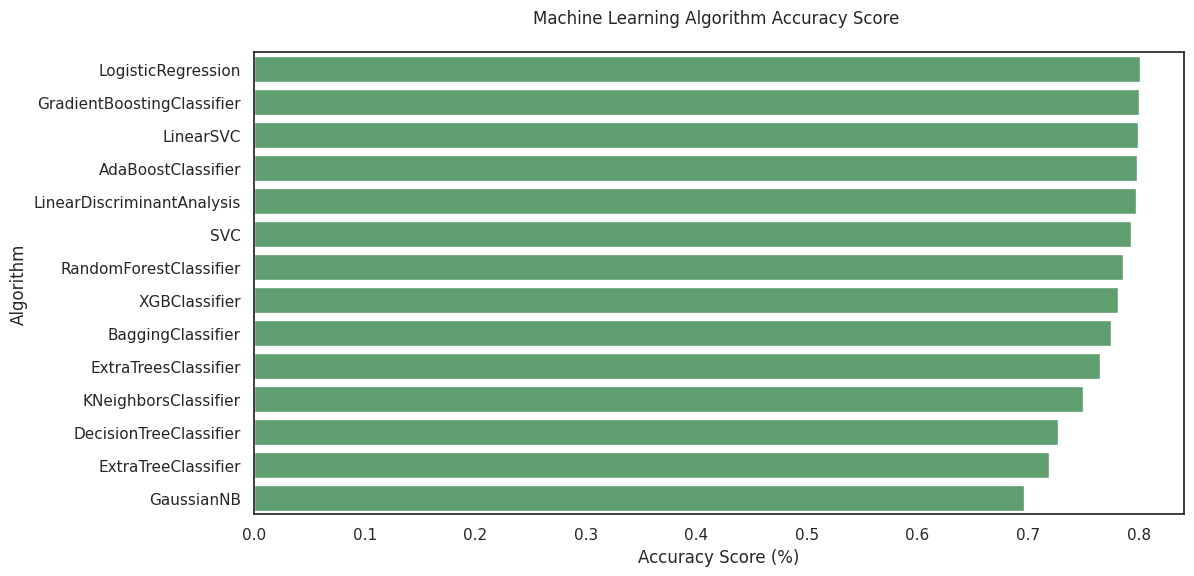

In [35]:
plt.figure(figsize = (12, 6))
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = ML_table, color = 'g')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## Hyperparameter Tuning

#### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}
gs = GridSearchCV(LogisticRegression(), param_grid = params, n_jobs = -1, cv = cv_split, scoring = 'accuracy')
gs.fit(x_train, y_train)

In [37]:
gs.best_score_

0.8014021961024127

In [38]:
gs.best_params_

{'C': 4.281332398719396, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

In [39]:
gs.score(x_test, y_test)

0.8128555176336746

#### Gradient Boosting Classifier

In [41]:
from sklearn.model_selection import StratifiedKFold
params = {
          'loss': ['log_loss', 'exponential'],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
          'n_estimators': [50, 100, 150, 200, 300], 
          'criterion': ['friedman_mse', 'squared_error'],
          'max_features': ['sqrt', 'log2']
          }
gs_gb = GridSearchCV(GradientBoostingClassifier(), param_grid = params, n_jobs = -1, cv = StratifiedKFold(n_splits = 5), 
                  verbose = 1)
gs_gb.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300]},
             verbose=1)

In [42]:
gs_gb.best_score_

0.8071674595537649

In [43]:
gs_gb.score(x_test, y_test)

0.8088737201365188

#### SVC

In [44]:
params = [
    {'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
    },
    {
    'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['linear', 'sigmoid'],
    }
]
gs_svc = GridSearchCV(SVC(),param_grid = params, n_jobs = -1, cv = StratifiedKFold(n_splits = 5), 
                  verbose = 1)
gs_svc.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'C': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                          'kernel': ['linear', 'sigmoid']}],
             verbose=1)

In [45]:
gs_svc.best_score_

0.7999622291968309

In [46]:
gs_svc.score(x_test, y_test)

0.8065984072810012

#### Random Forest

In [48]:
params = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,4,6,8,10,None], 
    'random_state': [0],
    'max_features': ['sqrt', 'log2', 20, 25, 30 ,35, 40]
}

gs_rf = GridSearchCV(RandomForestClassifier(),param_grid = params, n_jobs = -1, cv = StratifiedKFold(n_splits = 5), scoring = 'roc_auc',
                  verbose = 1)
gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 1134 candidates, totalling 5670 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': ['sqrt', 'log2', 20, 25, 30, 35, 40],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500],
                         'random_state': [0]},
             scoring='roc_auc', verbose=1)

In [49]:
gs_rf.best_score_

0.8465206070323106

In [57]:
gs_rf.score(x_test, y_test)

0.8481451903272431

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gs_rf.predict(x_test))

0.8094425483503982

#### K-NN

In [ ]:
# calculating the accuracy of the models with different of K
mean_acc = np.zeros(30)
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_hat)

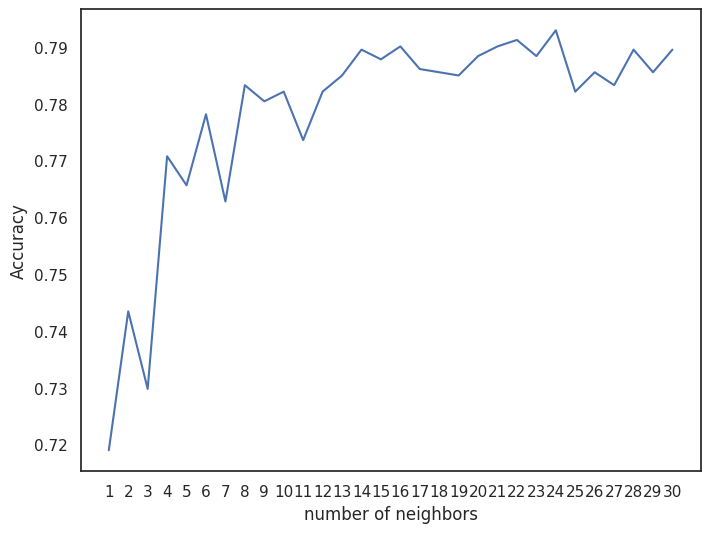

In [53]:
plt.figure(figsize=(8,6))
plt.plot(range(1,31),mean_acc)
plt.xticks(np.arange(1,31,1.0))
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
params = {
    'n_neighbors': np.arange(24,40,2),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid = params, n_jobs = -1, cv = StratifiedKFold(n_splits = 5), 
                  verbose = 1)
gs_knn.fit(x_train, y_train)

In [58]:
gs_knn.best_score_

0.7910506578414885

In [59]:
gs_knn.score(x_test, y_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fbbc09abf70>
Traceback (most recent call last):
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.7901023890784983

#### XGBoost

In [61]:
xgb_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, booster = 'gbtree',
                          objective = 'binary:logistic', verbosity = 0, nthread = -1,
                          random_state = 1337)
params = {
    'min_child_weight': [None, 1, 5, 10],
    'gamma': [None, 0.1, 1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1, 2, 3, 4, 5]
}
gs_xg = GridSearchCV(xgb_model , param_grid = params, n_jobs = -1, cv = StratifiedKFold(n_splits = 5), 
                  verbose = 1)
gs_xg.fit(x_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importa...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [None, 0.1, 1, 5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [None, 1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [62]:
gs_xg.best_score_

0.8092527676106369

In [63]:
gs_xg.score(x_test, y_test)

0.8128555176336746

In [ ]:
Acc = pd.DataFrame({'Accuracy': [accuracy_score(y_test, gs.predict(x_test)), 
                           accuracy_score(y_test, gs_gb.predict(x_test)),
                           accuracy_score(y_test, gs_knn.predict(x_test)),
                           accuracy_score(y_test, gs_rf.predict(x_test)),
                           accuracy_score(y_test, gs_svc.predict(x_test)),
                           accuracy_score(y_test, gs_xg.predict(x_test))]}, index = ['logistic regression', 
                                                                                         'gradient boosting',
                                                                                         'K-NN',
                                                                                         'random Forest',
                                                                                         'SVC',
                                                                                         'XGBoost'])

In [67]:
Acc.sort_values('Accuracy', ascending = False)

,Accuracy
logistic regression,0.812856
XGBoost,0.812856
random Forest,0.809443
gradient boosting,0.808874
SVC,0.806598
K-NN,0.790102
